In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns

In [2]:
task2_file = pd.read_table('fail2.csv', sep='\t')
T2F = task2_file.copy()

В начале нужно понять с чем имеешь дело

In [3]:
T2F

,login,uid,docid,jud,cjud
0,assessor158,158,0,0,0
1,assessor238,238,0,0,0
2,assessor488,488,0,0,0
3,assessor136,136,0,0,0
4,assessor300,300,0,0,0
...,...,...,...,...,...
249995,assessor208,208,49999,1,1
249996,assessor139,139,49999,1,1
249997,assessor333,333,49999,1,1
249998,assessor160,160,49999,1,1


In [4]:
len(T2F['login'].unique())

600

In [5]:
len(T2F['docid'].unique())

50000

Проанализировав данные по каждому документу в отдельности, можно увидеть документы, при оценке которых ошибки допускаются в 100% случаев. Их следует удалить из дальнейшего анализа

In [6]:
dfd = pd.DataFrame(columns=['value'])
T2Fd = T2F.drop(['login', 'uid'], axis=1)
for doc in T2Fd['docid'].unique():
    DF = T2Fd.loc[T2Fd['docid'] == doc]
    l = DF.shape[0]
    xDF = DF.loc[DF['jud'] != DF['cjud']]
    x = xDF.shape[0]
    dfd = dfd.append(pd.DataFrame([round(100 * x / l, 1)], index=[doc], columns=['value']))
dfd.sort_values(by='value', inplace=True, ascending=False)
dfd

,value
41326,100.0
34709,100.0
9457,100.0
2906,100.0
16261,80.0
...,...
23442,0.0
23440,0.0
23439,0.0
23438,0.0


In [8]:
T2F = T2F.loc[T2F['docid'] != 41326]
T2F = T2F.loc[T2F['docid'] != 34709]
T2F = T2F.loc[T2F['docid'] != 9457]
T2F = T2F.loc[T2F['docid'] != 2906]

Посмотрим как часто асессоры допускают ошибки

In [12]:
dfu = pd.DataFrame(columns=['value'])
T2Fu = T2F.drop(['login', 'docid'], axis=1)
for user in T2Fu['uid'].unique():
    UF = T2Fu.loc[T2Fu['uid'] == user]
    l = UF.shape[0]
    xUF = UF.loc[UF['jud'] != UF['cjud']]
    x = xUF.shape[0]
    dfu = dfu.append(pd.DataFrame([str(round(1 / (100 * x / l / AVG), 2)) + ' (' + str(round(100 * x / l, 1)) + '%)'], index=[user], columns=['value']))
dfu.sort_values(by='value', inplace=True, ascending=False)
dfu

,value
56,57.42
3,53.99
118,52.43
390,51.94
234,51.52
...,...
191,7.85
63,7.82
184,7.71
545,7.66


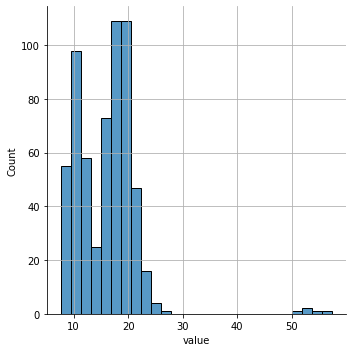

In [15]:
ax = sns.displot(dfu['value'])
plt.grid()
plt.show()

Видно, что есть группа людей, которые допускают ошибки чаще чем в 50% случаев

Найдем среднее значение ошибочности

In [16]:
AVG = dfu['value'].mean()
AVG

15.92735

Разделим частоту ошибок асессора на среднюю и поделим единицу на это значение. Тогда если асессор имеет оценку 1 - он является совершенно среднестатистическим. Если оценка 2 - значит он работает в два раза лучше обычного служащего. При этом следует помнить про фактическое качество его работы, так что в скобках будет указана частота его ошибок 

In [17]:
dfu = pd.DataFrame(columns=['value'])
for user in T2Fu['uid'].unique():
    UF = T2Fu.loc[T2Fu['uid'] == user]
    l = UF.shape[0]
    xUF = UF.loc[UF['jud'] != UF['cjud']]
    x = xUF.shape[0]
    dfu = dfu.append(pd.DataFrame([str(round(1 / (100 * x / l / AVG), 2)) + ' (' + str(round(100 * x / l, 1)) + '%)'], index=[user], columns=['value']))
dfu.sort_values(by='value', inplace=True, ascending=False)
dfu

,value
296,2.09 (7.6%)
545,2.08 (7.7%)
184,2.07 (7.7%)
63,2.04 (7.8%)
191,2.03 (7.9%)
...,...
390,0.31 (51.9%)
234,0.31 (51.5%)
3,0.3 (54.0%)
118,0.3 (52.4%)


Таким образом качественная работа - это оценка выше единицы